## Objective:
The goal of this project is to identify & categorize the news articles into several categories like politics, technology, sports, business and entertainment based on their content using a bunch of news articles extracted from the companies’ internal database.

### Import Required Libraries

In [1]:
# Import the libraries

# For reading & manipulating the data
import pandas as pd
import numpy as np

# For visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore all warnings
import warnings
warnings.filterwarnings('ignore')

# To use Regular Expressions
import re

# To use Natural Language Processing
import nltk

# For tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# To remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

# For lemmetization
from nltk import WordNetLemmatizer
nltk.download('wordnet')

# For BoW & TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# For encoding the categorical variable
!pip install category_encoders
import category_encoders as ce

# To try out different ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# To perform train-test split
from sklearn.model_selection import train_test_split

# Performace Metrics for evaluating the model
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00


In [2]:
# Load the dataset
data_df = pd.read_csv('/content/flipitnews-data.csv')

In [ ]:
# Shape of the dataset
print("Given dataset contains {0} Rows and {1} Columns".format(data_df.shape[0], data_df.shape[1]))

Given dataset contains 2225 Rows and 2 Columns


In [ ]:
data_df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
data_df.info

<bound method DataFrame.info of            Category                                            Article
0        Technology  tv future in the hands of viewers with home th...
1          Business  worldcom boss  left books alone  former worldc...
2            Sports  tigers wary of farrell  gamble  leicester say ...
3            Sports  yeading face newcastle in fa cup premiership s...
4     Entertainment  ocean s twelve raids box office ocean s twelve...
...             ...                                                ...
2220       Business  cars pull down us retail figures us retail sal...
2221       Politics  kilroy unveils immigration policy ex-chatshow ...
2222  Entertainment  rem announce new glasgow concert us band rem h...
2223       Politics  how political squabbles snowball it s become c...
2224         Sports  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]>

In [ ]:
data_df.describe()

,Category,Article
count,2225,2225
unique,5,2126
top,Sports,kennedy questions trust of blair lib dem leade...
freq,511,2


In [ ]:
data_df.nunique()

Category       5
Article     2126
dtype: int64

In [ ]:
# Check the distribution of categories
def display_unique_values(df):
  print("*** Unique Values count of Categorical Variables ***\n")
  for col in df.astype('object').columns:
    if len(df[col].value_counts())<10:
      print(df[col].value_counts().to_string(),'\n')

display_unique_values(data_df)


*** Unique Values count of Categorical Variables ***

Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386 



In [ ]:
def draw_cntplot_categories(df):
  plt.figure(figsize=(8,5))
  ax = sns.countplot(x='Category', data=df)
  ax.bar_label(ax.containers[0])
  ax.set_title('Distribution of Categories')
  ax.set_ylabel('# of Articles')
  plt.show()


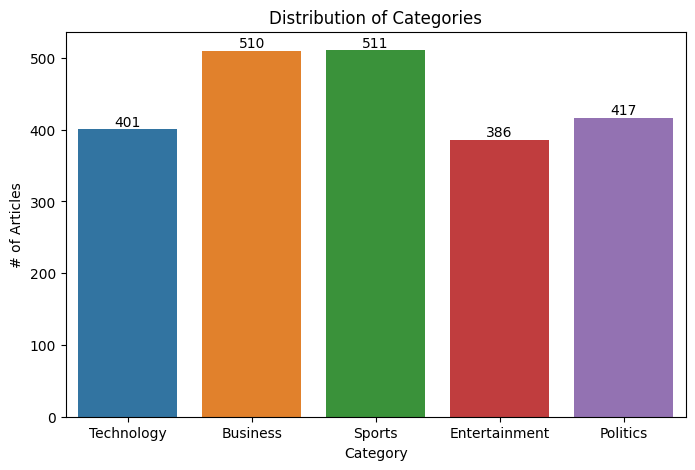

In [ ]:
draw_cntplot_categories(data_df)

In [3]:
# Single Article - before Text Processing
data_df['Article'][1]

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

##### - Single news article before text processing looks like this. It is observed that the text is already in lower case.

### Pre-process & Clean the Data

The major steps in cleaning the Text Data are:
*   Removing the Punctuations (like , . ! etc.,)
*   Converting the text to lower/upper case
*   Removing the stop words (frequently occurring words like a, an, the, etc.,)
*   Removing non-sensical words (“/n”, etc.,)
*   Tokenize the text
*   Stemming & Lemmatization
*   Normalize the text using Text Normalizers
*   Typo correction



In [5]:
stop_words = list(stopwords.words('english'))

In [6]:
def preprocess_text(sent):
  # Remove non-characters
  sent = re.sub('[^a-zA-Z]', ' ', sent)

  # Tokenize the Text into Words
  words = nltk.word_tokenize(sent)

  # Remove the stop words
  filtered_sent = [w for w in words if not w in stop_words]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  new_text = [lemmatizer.lemmatize(word) for word in filtered_sent]
  new_text = ' '.join(new_text)

  return new_text

In [7]:
data_df['Preprocessed_Article'] = data_df['Article'].apply(preprocess_text)

In [ ]:
data_df.describe()

,Category,Article,Preprocessed_Article
count,2225,2225,2225
unique,5,2126,2117
top,Sports,kennedy questions trust of blair lib dem leade...,microsoft get blogging bug software giant micr...
freq,511,2,2


In [ ]:
data_df.head()

,Category,Article,Preprocessed_Article
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


In [8]:
# Single Article - after Text Processing
data_df['Preprocessed_Article'][1]

'worldcom bos left book alone former worldcom bos bernie ebbers accused overseeing bn bn fraud never made accounting decision witness told juror david myers made comment questioning defence lawyer arguing mr ebbers responsible worldcom problem phone company collapsed prosecutor claim loss hidden protect firm share mr myers already pleaded guilty fraud assisting prosecutor monday defence lawyer reid weingarten tried distance client allegation cross examination asked mr myers ever knew mr ebbers make accounting decision aware mr myers replied ever know mr ebbers make accounting entry worldcom book mr weingarten pressed replied witness mr myers admitted ordered false accounting entry request former worldcom chief financial officer scott sullivan defence lawyer trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house card mr ebbers team meanwhile looking portray affable bos admission pe graduate economist whatever ability mr ebbers transformed

##### - Single news article after text processing looks like above. We can see that the text is free of all punctuations and the lemmatization has converted various words into their respective root words.

### Data Transformation

In [ ]:
# Encoding the Target Variable using Ordinal Encoder
encode = ce.OrdinalEncoder(cols=['Category'])
data_df = encode.fit_transform(data_df)

In [9]:
work_df = data_df.copy()

In [10]:
choice = int(input("Choose \n (1) For Bag of Words \n (2) To use TF-IDF \n Choice: "))

if choice == 1:
  cv = CountVectorizer(max_features=5000)
  X = cv.fit_transform(work_df.Preprocessed_Article).toarray()
  y = np.array(work_df['Category'].values)

elif choice == 2:
  tf_idf = TfidfVectorizer()
  X = tf_idf.fit_transform(work_df.Preprocessed_Article).toarray()
  y = np.array(work_df['Category'].values)

else:
  print("Invalid Input!")

Choose 
 (1) For Bag of Words 
 (2) To use TF-IDF 
 Choice: 2


#### Segregate the Independent & Dependent variables

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Shape of the train & test data

In [ ]:
# Shape of train & test data sets after performing a 75:25 split
print("Number of rows in train set is {}".format(X_train.shape[0]))
print("Number of rows in test set is {}".format(X_test.shape[0]))

Number of rows in train set is 1668
Number of rows in test set is 557


## Base Model - Naive Bayes Classifier

In [13]:
# Build Naive Bayes Classifier
nb_classifier = MultinomialNB()

# Train NB Model
nb_classifier.fit(X_train, y_train)

# Evaluate NB Model
nb_predictions = nb_classifier.predict(X_test)
print('Naive Bayes Classifier:')
print(classification_report(y_test, nb_predictions))

Naive Bayes Classifier:
               precision    recall  f1-score   support

     Business       0.97      0.96      0.97       136
Entertainment       1.00      0.93      0.96        96
     Politics       0.93      0.99      0.96        98
       Sports       0.98      1.00      0.99       124
   Technology       0.97      0.97      0.97       103

     accuracy                           0.97       557
    macro avg       0.97      0.97      0.97       557
 weighted avg       0.97      0.97      0.97       557



In [ ]:
# Predict the probabilities for each class
nb_probabilities = nb_classifier.predict_proba(X_test)

In [ ]:
# Calculate ROC AUC score for Naive Bayes
nb_roc_auc = roc_auc_score(y_test, nb_probabilities, multi_class='ovr')
print("ROC AUC Score of Base Model {:.3f}".format(nb_roc_auc))

ROC AUC Score of Base Model 0.998


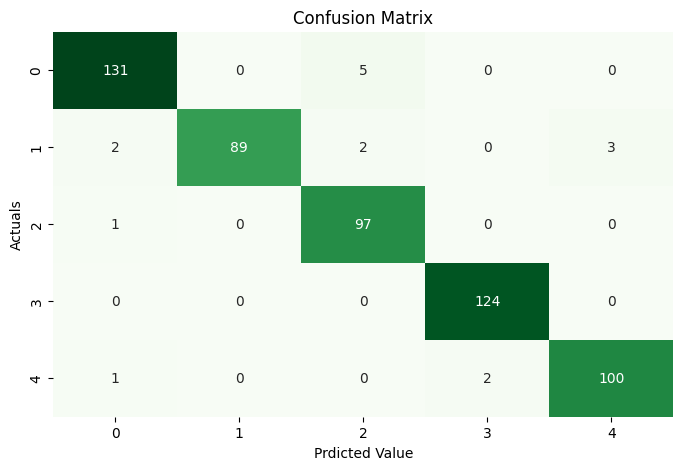

In [17]:
# Confusion Matrix
y_pred_nb = nb_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel('Prdicted Value')
plt.ylabel('Actuals')
plt.show()

## Helper Functions

#### Model Training

In [18]:
def model_train(obj):
  obj.fit(X_train, y_train)
  y_pred = obj.predict(X_test)
  y_pred_proba = obj.predict_proba(X_test)
  return y_pred, y_pred_proba

#### Model Evaluation

In [19]:
def model_eval(obj, y_pred, y_pred_proba):
  print("**************************************")

  # Train & Test accuracy
  train_acc = accuracy_score(y_train, obj.predict(X_train))
  test_acc = accuracy_score(y_test, obj.predict(X_test))

  print("Train Accuracy: {:.3f}".format(train_acc))
  print("Test Accuracy: {:.3f}".format(test_acc))

  # ROC AUC Score
  print("ROC AUC Score: {:.3f}".format(roc_auc_score(y_test, y_pred_proba, multi_class='ovr')))

  # Precision, Recall and f1_score
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')

  print("Precision: {:.3f}".format(precision))
  print('Recall: {:.3f}'.format(recall))
  print('F1 Score: {:.3f}'.format(f1))

  print("**************************************")

## Linear SVM

In [21]:
# Create SVM Model
from sklearn.svm import LinearSVC
svm_classifier = LinearSVC()

# Train SVM Model
svm_classifier.fit(X_train, y_train)

# Evaluate SVM Model
svm_predictions = svm_classifier.predict(X_test)
print('Linear SVM Classifier:')
print(classification_report(y_test, svm_predictions))

Linear SVM Classifier:
               precision    recall  f1-score   support

     Business       0.97      0.93      0.95       136
Entertainment       0.99      0.99      0.99        96
     Politics       0.95      0.98      0.96        98
       Sports       0.98      1.00      0.99       124
   Technology       0.99      0.98      0.99       103

     accuracy                           0.97       557
    macro avg       0.98      0.98      0.98       557
 weighted avg       0.97      0.97      0.97       557



In [ ]:
svm_probabilities = svm_classifier.decision_function(X_test)

In [ ]:
from sklearn.preprocessing import label_binarize
from scipy.special import softmax

# Convert decision function scores to probabilities using softmax
svm_probabilities = softmax(svm_probabilities, axis=1)

# Binarize the true labels for multi-class ROC AUC
y_test_bin = label_binarize(y_test, classes=data_df['Category'].unique())

# Calculate ROC AUC score for Linear SVM
svm_roc_auc = roc_auc_score(y_test_bin, svm_probabilities, multi_class='ovr')

In [ ]:
print('Linear SVM ROC AUC {:.3f}'.format(svm_roc_auc))

Linear SVM ROC AUC 0.999


## Decision Tree Classifier Model

In [25]:
# Create the Model Object
dt = DecisionTreeClassifier()

# Train the model
y_pred_dt, y_pred_proba_dt = model_train(dt)

# Evaluate the model
model_eval(dt, y_pred_dt, y_pred_proba_dt)

**************************************
Train Accuracy: 1.000
Test Accuracy: 0.826
ROC AUC Score: 0.890
Precision: 0.828
Recall: 0.826
F1 Score: 0.826
**************************************


## Nearest Neighbors Classifier

In [26]:
# Creating the model object
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
y_pred_knn, y_pred_proba_knn = model_train(knn)

# Evalute the model
model_eval(knn, y_pred_knn, y_pred_proba_knn)

**************************************
Train Accuracy: 0.961
Test Accuracy: 0.939
ROC AUC Score: 0.990
Precision: 0.940
Recall: 0.939
F1 Score: 0.939
**************************************


## Random Forest Classifier

In [27]:
# Create the model
rf = RandomForestClassifier()

# Train the model
y_pred_rf, y_pred_proba_rf = model_train(rf)

# Evaluate the model
model_eval(rf, y_pred_rf, y_pred_proba_rf)

**************************************
Train Accuracy: 1.000
Test Accuracy: 0.950
ROC AUC Score: 0.997
Precision: 0.951
Recall: 0.950
F1 Score: 0.950
**************************************


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.preprocessing.text import Tokenizer
import keras.utils
from keras.utils import pad_sequences

In [ ]:
# Train and evaluate an LSTM-based deep learning model
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
max_sequence_length = 500
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

In [ ]:
num_categories = len(work_df['Category'].unique())
lstm_model = Sequential()
lstm_model.add(Embedding(max_words, 100, input_length=max_sequence_length))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(num_categories, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Convert the target variable to one-hot encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Convert to one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_one_hot = keras.utils.to_categorical(y_train_encoded, num_classes)
y_test_one_hot = keras.utils.to_categorical(y_test_encoded, num_classes)

In [ ]:
# Train the LSTM model
lstm_model.fit(X_train_padded, y_train_one_hot, validation_data=(X_test_padded, y_test_one_hot), epochs=10, batch_size=64)


Epoch 1/10
28/28 [==============================] - 33s 1s/step - loss: 0.3126 - accuracy: 0.9455 - val_loss: 0.8262 - val_accuracy: 0.7191
Epoch 2/10
28/28 [==============================] - 36s 1s/step - loss: 0.2785 - accuracy: 0.9528 - val_loss: 0.4115 - val_accuracy: 0.8831
Epoch 3/10
28/28 [==============================] - 32s 1s/step - loss: 0.0651 - accuracy: 0.9966 - val_loss: 0.2640 - val_accuracy: 0.9281
Epoch 4/10
28/28 [==============================] - 32s 1s/step - loss: 0.0218 - accuracy: 0.9994 - val_loss: 0.2619 - val_accuracy: 0.9326
Epoch 5/10
28/28 [==============================] - 30s 1s/step - loss: 0.0146 - accuracy: 0.9994 - val_loss: 0.2347 - val_accuracy: 0.9393
Epoch 6/10
28/28 [==============================] - 29s 1s/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.2390 - val_accuracy: 0.9393
Epoch 7/10
28/28 [==============================] - 35s 1s/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.2376 - val_accuracy: 0.9416
Epoch 8/10
28/28 [==

In [ ]:
# Evaluate the LSTM model
lstm_predictions = lstm_model.predict(X_test_padded)
# Extract the predicted class labels
lstm_predictions = np.argmax(lstm_predictions, axis=1)
lstm_predictions_labels = label_encoder.inverse_transform(lstm_predictions)


14/14 [==============================] - 3s 226ms/step


In [ ]:
print('LSTM Model:')
print(classification_report(y_test, lstm_predictions_labels))

LSTM Model:
               precision    recall  f1-score   support

     Business       0.94      0.90      0.92       101
Entertainment       0.92      0.90      0.91        81
     Politics       0.95      0.92      0.93        83
       Sports       0.95      0.98      0.96        98
   Technology       0.89      0.95      0.92        82

     accuracy                           0.93       445
    macro avg       0.93      0.93      0.93       445
 weighted avg       0.93      0.93      0.93       445



## **Questionnaire**:
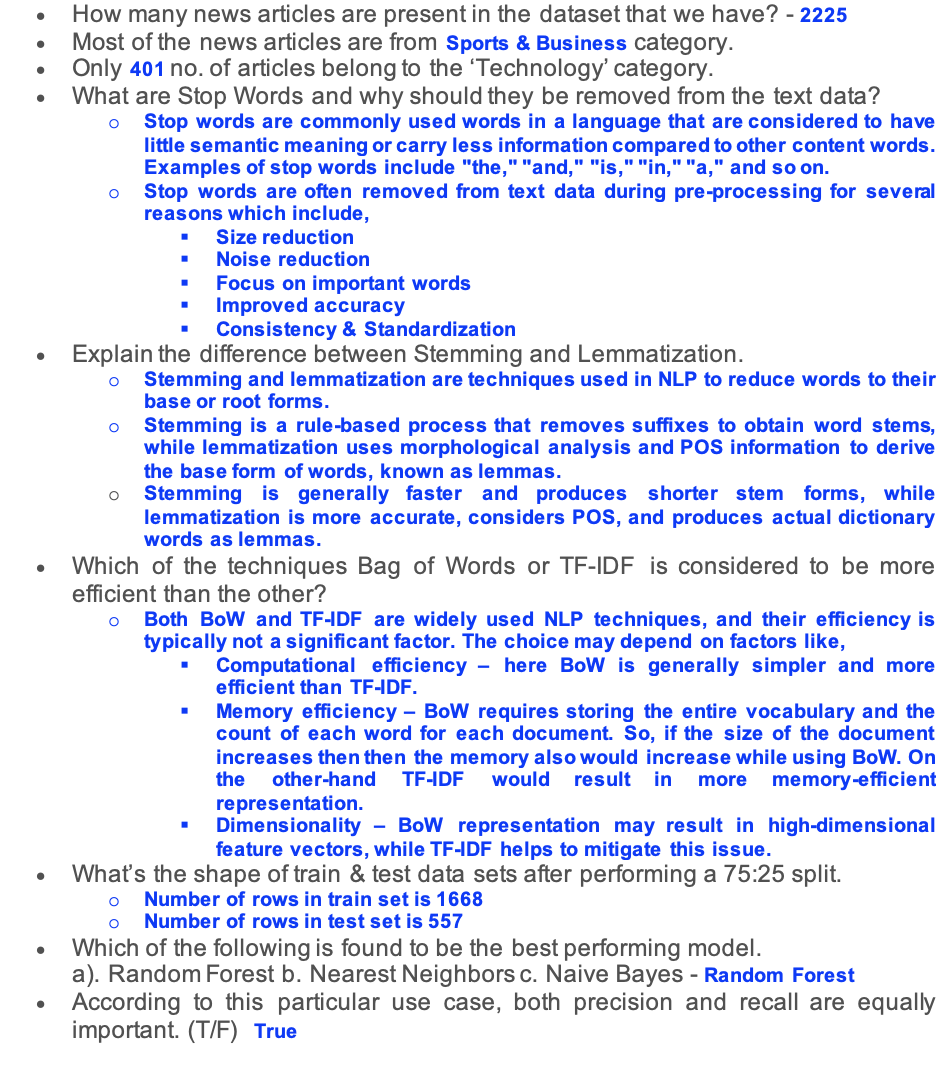

## **Summary**

The final comparative summary of the models (Naive Bayes, Decision Tree, Nearest Neighbour, Random Forest, Linear SVM, and LSTM) for news article categorization is:

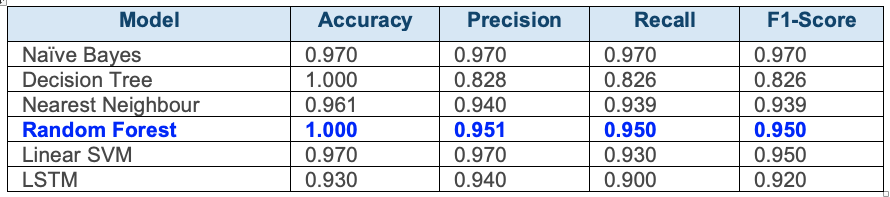

In the table, each model is evaluated based on various performance metrics such as accuracy, precision, recall, and F1-score. The metrics provide an indication of how well the models perform in categorizing news articles based on their content.